In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [5]:
df=pd.read_csv('C://Users//Ishoo//Desktop//codsoft//t3//iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


data cleaning

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df["species"].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [10]:
df.species.replace({"Iris-setosa":"setosa","Iris-versicolor":"versicolor","Iris-virginica":"virginica"},inplace=True)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: >

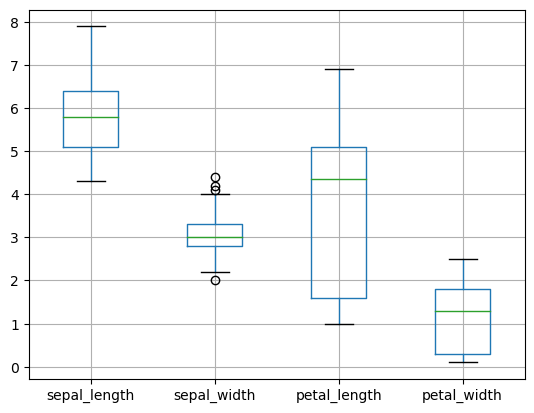

In [14]:
df.boxplot(column=["sepal_length","sepal_width","petal_length","petal_width"])

In [15]:
data_num=df[["sepal_length","sepal_width","petal_length","petal_width"]]

In [16]:
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


In [17]:
out_rows=((data_num < (Q1 - 1.5 * IQR)) |(data_num > (Q3 + 1.5 * IQR))).any(axis=1)
out_rows

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [18]:
df=df[~out_rows]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.boxplot(column=["sepal_length","sepal_width","petal_length","petal_width"])

<Axes: >

check whether the dataset balanced

In [20]:
df["species"].value_counts()

virginica     50
versicolor    49
setosa        47
Name: species, dtype: int64

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113977,0.879374,0.822577
sepal_width,-0.113977,1.000000,-0.397123,-0.329782
petal_length,0.879374,-0.397123,1.000000,0.961755
petal_width,0.822577,-0.329782,0.961755,1.000000


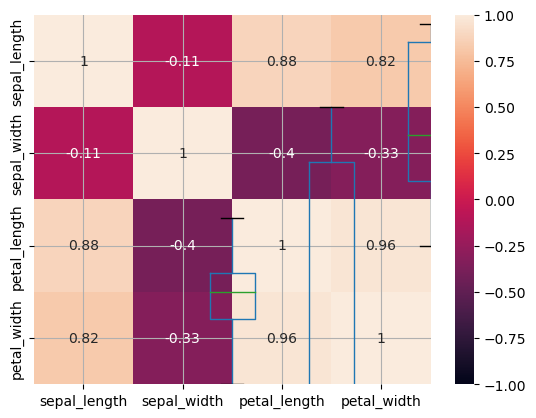

In [22]:
sns.heatmap(df[["sepal_length","sepal_width","petal_length","petal_width"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

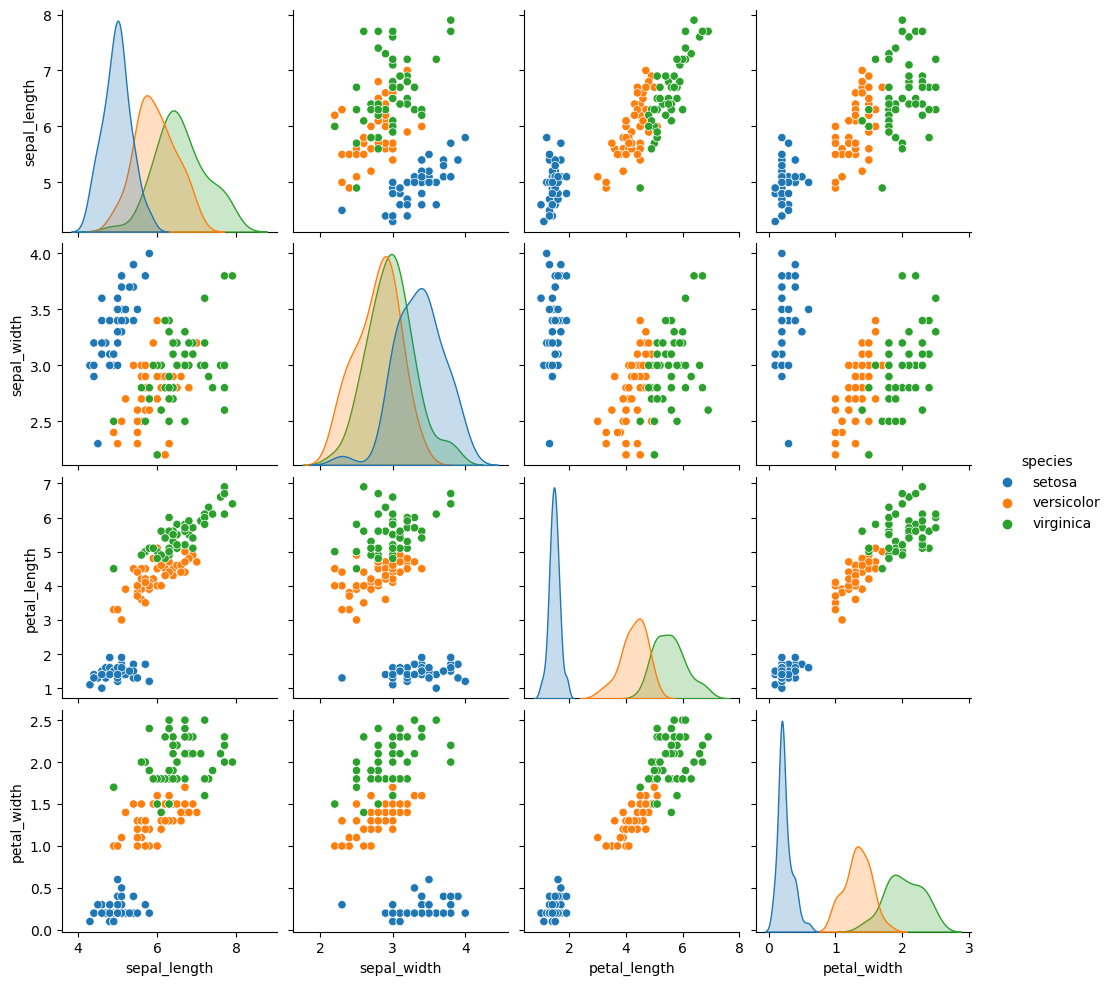

In [23]:
sns.pairplot(df,hue="species")
plt.show()

** setos has long petals
petal length and petal width are most dominant features for predict the species

convert categorical data(species) into numerical format

In [24]:
from sklearn.preprocessing import LabelEncoder
sp_le=LabelEncoder()

In [25]:
df["species"]=sp_le.fit_transform(df["species"])

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Preprocessing

In [27]:
X = df.iloc[:,:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y = df['species']


In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,classification_report

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Training the models, model prediction

Logistic Regression model

In [31]:
model1=LogisticRegression()

In [32]:
model1.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_predict1=model1.predict(x_test)

In [34]:
confusion_matrix(y_test,y_predict1)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [50]:
print ("Accuracy of LogisticRegression= %.2f" % (accuracy_score(y_test, y_predict1)))

Accuracy of LogisticRegression= 0.98


KNeighbors classifier model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [37]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_predict2=model2.predict(x_test)

In [39]:
confusion_matrix(y_test,y_predict2)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [49]:
print ("Accuracy of KNeighbors= %.2f" % (accuracy_score(y_test, y_predict2)))

Accuracy of KNeighbors= 0.98


Decison Tree model

In [41]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()

In [42]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_predict3=model3.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_predict3)

In [47]:
print ("Accuracy of Decistion tree= %.2f" % (accuracy_score(y_test, y_predict3)))

Accuracy of Decistion tree= 0.98


All the models(Decistion tree, logistic regression and KNeighbors) performs well on predicting the species of the iris flower with the higher accuracy. Inorder to avoid overfitts, DecisionTree model is selected.